In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji, string
import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.corpus import stopwords
nltk.download('stopwords')

df = pd.read_csv('DataSet.csv')
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

df.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervseah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(17880, 18)

In [2]:
display(df)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


## 1. Exploratory Data Analysis

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                                       title            location department   
0                           Marketing Intern    US, NY, New York  Marketing  \
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

  salary_range                                    company_profile   
0          NaN  <h3>We're Food52, and we've created a groundbr...  \
1          NaN  <h3>90 Seconds, the worlds Cloud Video Product...   
2          NaN  <h3></h3>\r\n<p>Valor Services provides Workfo...   
3          NaN  <p>Our passion for improving quality of life t...   
4          NaN  <p>SpotSource Solutions LLC is a Global Human ...   

                                         description   
0  <p>Food52, a fast-grow

In [4]:
# Check for basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  o

In [5]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                          title         location department salary_range   
count                     17880            17534       6333         2868  \
unique                    11231             3105       1337          874   
top     English Teacher Abroad   GB, LND, London      Sales          0-0   
freq                        311              718        551          142   

                                          company_profile   
count                                               14572  \
unique                                               1710   
top     <p>We help teachers get safe &amp; secure jobs...   
freq                                                  726   

                                              description   
count                                               17880  \
unique                                              15095   
top     <p>Play with kids, get paid for it </p>\r\n<p>...   
freq                                            

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64


In [7]:
# Check for duplicate rows and drop them later
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
235


/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_27355/2187502205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


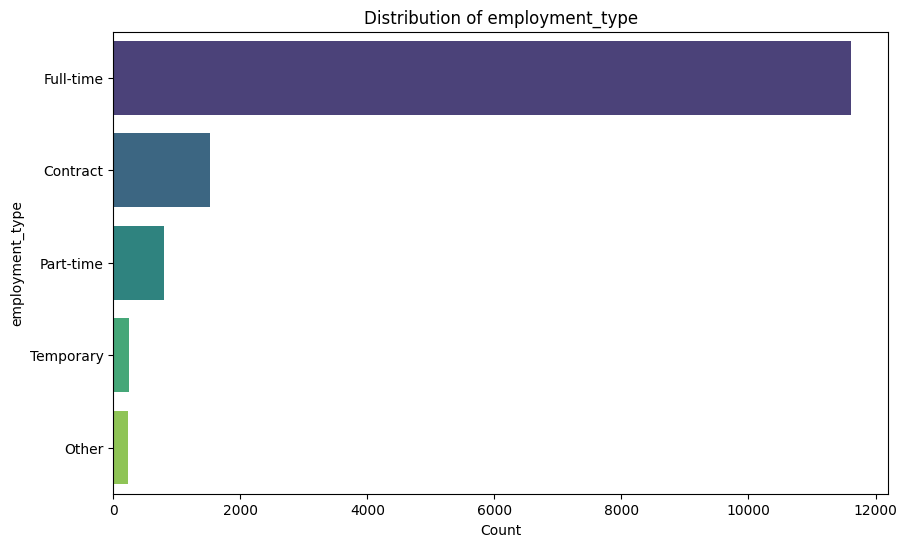

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_27355/2187502205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


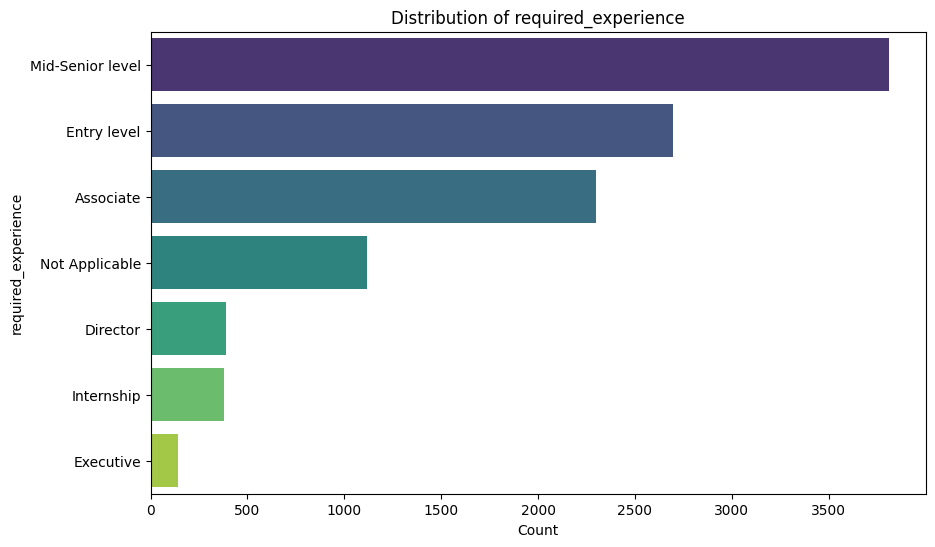

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_27355/2187502205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


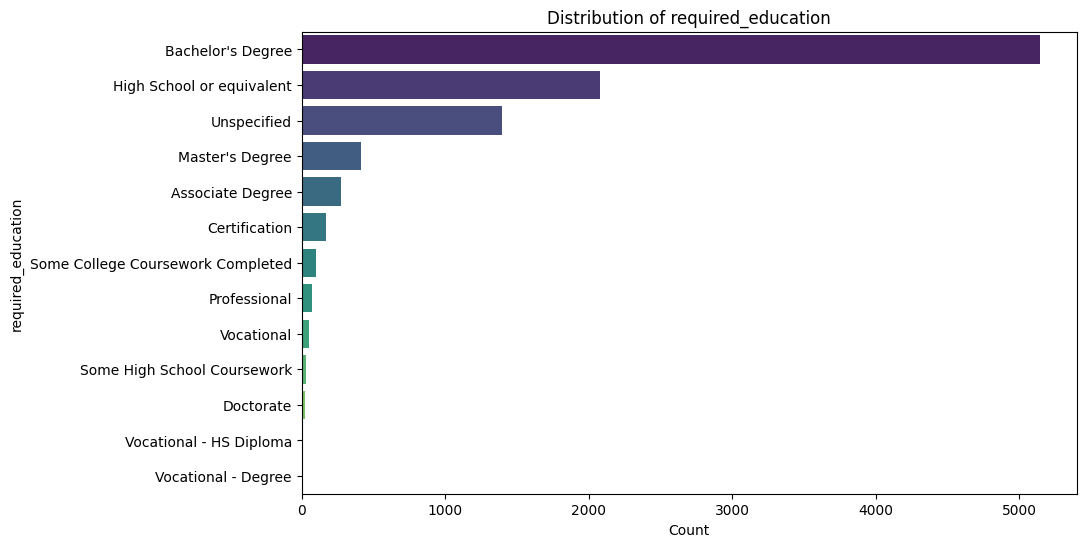

/var/folders/qr/nrj_437j6c97gz0h835gbb2r0000gn/T/ipykernel_27355/2187502205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


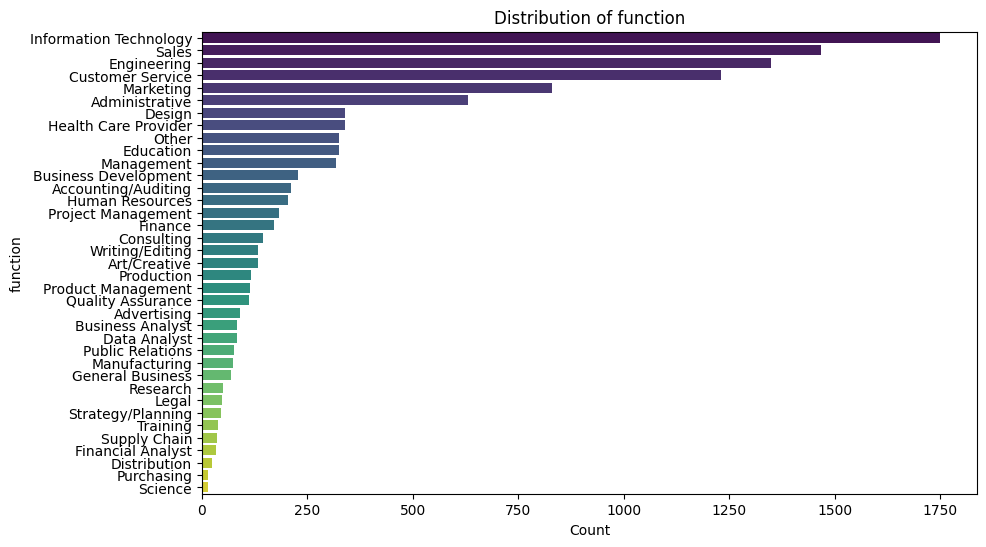

In [8]:
# 1. Bar plot for categorical distributions
categorical_columns = ['employment_type', 'required_experience', 'required_education', 'function']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [9]:
df['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-12', '44000-57000', '18500-28000', '55000-75000',
       '30000-35000', '0-0', '20000-40000', '360000-600000',
       '50000-80000', '80000-100000', '52000-78000', '15750-15750',
       '40000-65000', '45000-50000', '30000-37000', '45000-67000',
       '35000-100000', '180000-216000', '45000-65000', '28000-32000',
       '0-1000', '36000-40000', '80000-110000', '35000-73000',
       '19000-19000', '60000-120000', '120000-15000000', '42000-55000',
       '90000-120000', '100000-150000', '28000-38000', '1600-1700',
       '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '13000

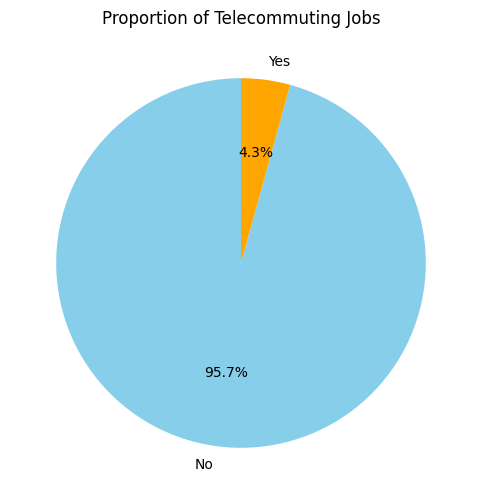

In [10]:
# Proportion of telecommuting jobs
plt.figure(figsize=(6, 6))
telecommuting_counts = df['telecommuting'].value_counts()
telecommuting_counts.plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of Telecommuting Jobs')
plt.ylabel('')
plt.show()

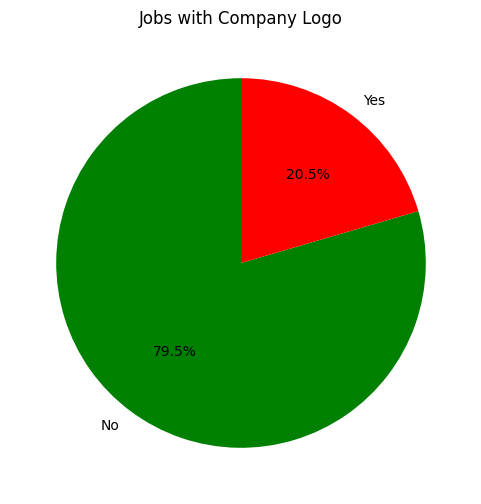

In [11]:
# Proportion of jobs with company logo
plt.figure(figsize=(6, 6))
company_logo_counts = df['has_company_logo'].value_counts()
company_logo_counts.plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90, colors=['green', 'red'])
plt.title('Jobs with Company Logo')
plt.ylabel('')
plt.show()

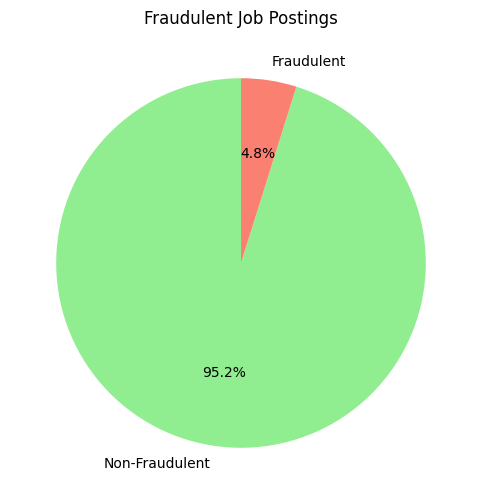

In [12]:
# Fraudulent job postings
plt.figure(figsize=(6, 6))
fraudulent_counts = df['fraudulent'].value_counts()
fraudulent_counts.plot.pie(autopct='%1.1f%%', labels=['Non-Fraudulent', 'Fraudulent'], startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Fraudulent Job Postings')
plt.ylabel('')
plt.show()

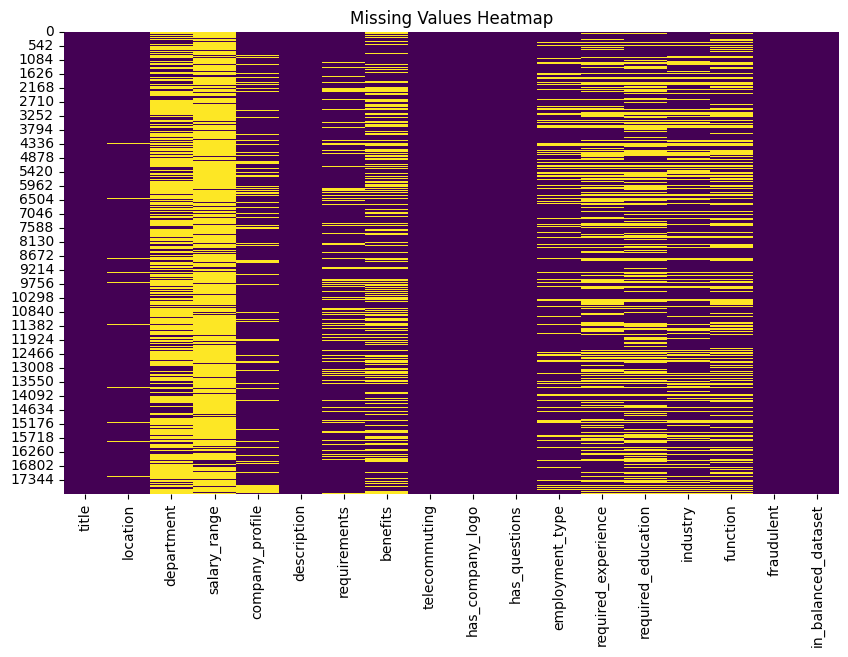

In [13]:
# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

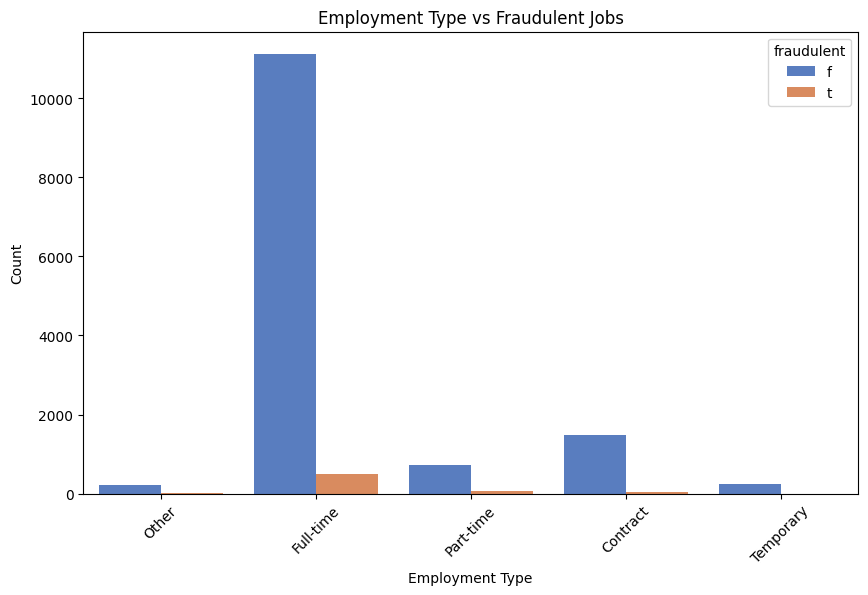

In [14]:
# Relationship between employment type and fraudulent job postings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='fraudulent', palette='muted')
plt.title('Employment Type vs Fraudulent Jobs')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


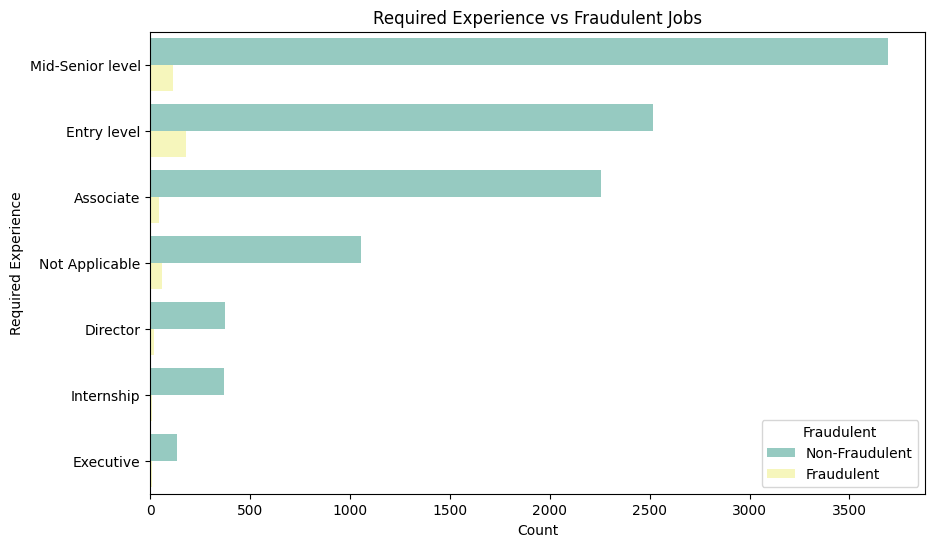

In [15]:
# Count Plot: Required Experience vs Fraudulent
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='required_experience', hue='fraudulent', palette='Set3', order=df['required_experience'].value_counts().index)
plt.title('Required Experience vs Fraudulent Jobs')
plt.xlabel('Count')
plt.ylabel('Required Experience')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

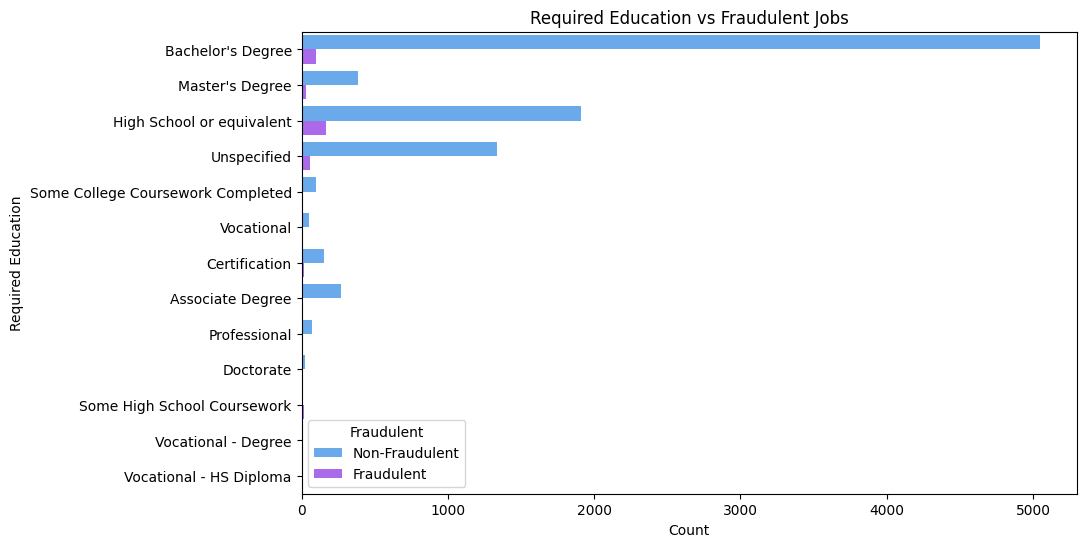

In [16]:
# Required Education vs Fraudulent (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='required_education', hue='fraudulent', palette='cool')
plt.title('Required Education vs Fraudulent Jobs')
plt.xlabel('Count')
plt.ylabel('Required Education')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

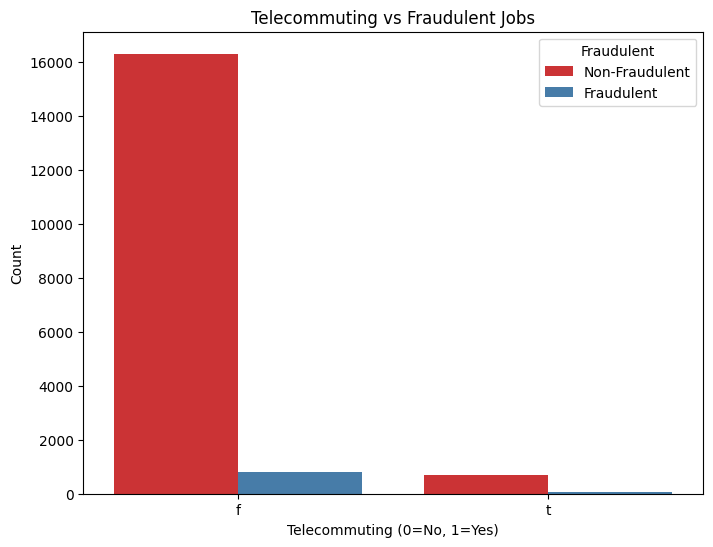

In [17]:
# Telecommuting vs Fraudulent (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='telecommuting', hue='fraudulent', palette='Set1')
plt.title('Telecommuting vs Fraudulent Jobs')
plt.xlabel('Telecommuting (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

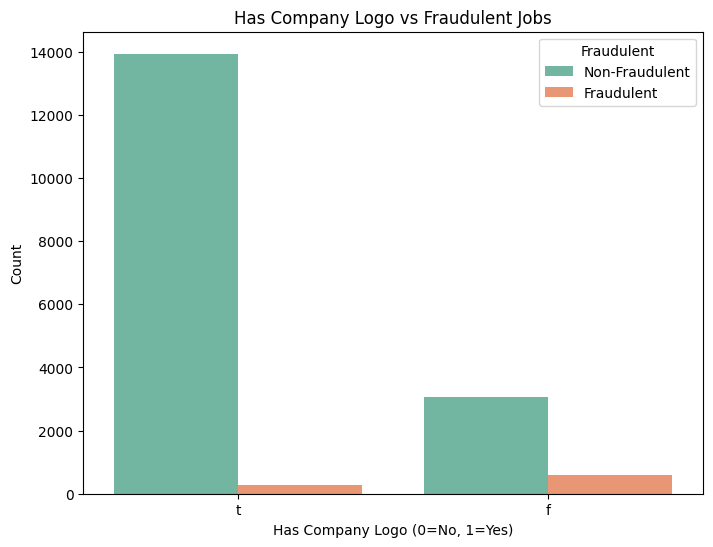

In [18]:
# Has Company Logo vs Fraudulent (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='has_company_logo', hue='fraudulent', palette='Set2')
plt.title('Has Company Logo vs Fraudulent Jobs')
plt.xlabel('Has Company Logo (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

## 2. Data Cleaning

In [19]:
df.drop_duplicates(subset=['title','location', 'department' , 'salary_range', 'company_profile', 'description', 'requirements', 'benefits','telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent'], keep='first', inplace=True)
df.shape

(17632, 18)

## 3. Feature Engineering

In [20]:
## TEXT PREPROCESSING FOR TEXTUAL COLUMNS

# Feature 1: COMBINING TEXTUAL COLUMNS INTO 1 COMBINED TEXT COLUMN

def clean_text_features(text):
    try:
        if pd.isnull(text):
            return ""

        # Remove HTML tags
        text = re.sub(r'<[^>]*>', '', text)

        # Convert to lowercase
        text = text.lower()

        # Remove non-alphanumeric characters (except specified punctuation)
        text = re.sub(r'[^\w\s.,:;!?\'"-]', '', text)

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Remove emojis
        #text = emoji.replace_emoji(text, replace="")

        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        words = text.split()
        filtered_words = [word for word in words if word not in stop_words]
        text = " ".join(filtered_words)

        return text

    except Exception as e:
        print(f"Error cleaning text: {e}")
        return ""


text_columns = ['title', 'benefits', 'description', 'requirements', 'company_profile']

for col in text_columns:
    df[col] = df[col].apply(clean_text_features)

df['combined_text_data'] = (
    df['title'] + ' ' +
    df['description'] + ' ' +
    df['requirements'] + ' ' +
    df['company_profile'] + ' ' +
    df['benefits']
)

# Feature 2: Since there are too many categories for location (3106) hence we decided to perform dimensionality reduction and just limit to the country and perform one-hot-encoding on country column
df['location'] = df['location'].fillna(",,")
df['country']=df['location'].apply(lambda x: x.split(",")[0])

# Dimensionality reduction
unique_locations = df['location'].nunique()
print(f"Number of unique values in 'location': {unique_locations}")

unique_country = df['country'].nunique()
print(f"Number of unique values in 'country': {unique_country}")


## Feature 3: feature engineering new numerical columns based on salary range column

df[['salary_lower', 'salary_upper']] = df['salary_range'].str.split('-', expand=True).astype(float)
df['salary_average'] = (df['salary_lower'] + df['salary_upper']) / 2
df['salary_range_diff'] = df['salary_upper'] - df['salary_lower']



Number of unique values in 'location': 3106
Number of unique values in 'country': 91


In [21]:
## encoding binary columns

binary_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

for column in binary_columns:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: 1 if x == 't' else (0 if x == 'f' else None))

In [22]:
#One hot encoding for categorical columns

categorical_columns = ['country', 'department', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function']

df[categorical_columns] = df[categorical_columns].fillna('Unknown')
# Perform one-hot encoding on the specified columns
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=False)

# Convert all resulting one-hot encoded columns to integers
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [24]:
# DROPPING RAW TEXTUAL COLUMNS THAT ARE UNUSED

columns_to_drop = ['title',
                    'description',
                    'requirements',
                    'company_profile',
                    'benefits',
                    'salary_range',
                    'location',
                    'in_balanced_dataset']

df.drop(columns_to_drop, axis = 1, inplace = True)

## 4a. Train Validation Test Split (Text, Categorical and Numerical columns)
Train-Test-Validation: 70-15-15

Standard scaling for numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('fraudulent', axis=1, inplace=False)
y = df['fraudulent']  # Target variable to predict

## splitting into training (70%) and remaining (30%)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state=42)

## splitting remaining into test (15%) and validation (15%)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=42)

# Scaling numerical columnsx

columns_to_normalize = ['salary_lower', 'salary_upper', 'salary_average', 'salary_range_diff']
scaler = StandardScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])
X_val[columns_to_normalize] = scaler.transform(X_val[columns_to_normalize])

for dataset in [X_train, X_val, X_test]:
    display(dataset.shape)

(12342, 1634)

(2645, 1634)

(2645, 1634)

## Train Validation Test Split (Only categorical columns) (No Combined Cleaned Text + No numerical columns)


In [ ]:
X = df.drop('fraudulent', axis=1, inplace=False)
y = df['fraudulent']

columns_to_drop2 = ['combined_text_data', 'salary_lower', 'salary_upper', 'salary_average', 'salary_range_diff']
X_cat = X.drop(columns_to_drop2, axis = 1)

## splitting into training (70%) and remaining (30%)
X_train_cat, X_rem_cat, y_train_cat, y_rem_cat = train_test_split(X_cat, y, test_size = 0.3, random_state=42)

## splitting remaining into test (15%) and validation (15%)
X_test_cat, X_val_cat, y_test_cat, y_val_cat = train_test_split(X_rem_cat, y_rem_cat, test_size = 0.5, random_state=42)


for dataset in [X_train_cat, X_val_cat, X_test_cat]:
    display(dataset.shape)

(12342, 1629)

(2645, 1629)

(2645, 1629)

## 5. Embeddings for textual data

In [ ]:
#Count Vectorizer Embedding
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train['combined_text_data'])
X_train_count =  count_vect.transform(X_train['combined_text_data'])
X_val_count = count_vect.transform(X_val['combined_text_data'])
X_test_count = count_vect.transform(X_test['combined_text_data'])

#TFIDF Embedding
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['combined_text_data'])
X_train_tfidf = tfidf_vect.transform(X_train['combined_text_data'])
X_val_tfidf = tfidf_vect.transform(X_val['combined_text_data'])
X_test_tfidf = tfidf_vect.transform(X_test['combined_text_data'])

In [ ]:
display(X_train_count.shape)
display(X_val_count.shape)
display(X_test_count.shape)

(12342, 60186)

(2645, 60186)

(2645, 60186)

In [ ]:
display(X_train_tfidf.shape)
display(X_val_tfidf.shape)
display(X_test_tfidf.shape)

(12342, 60126)

(2645, 60126)

(2645, 60126)

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


## 6. Machine Learning Models


### 6.1. Evaluation of different models

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, scoring='roc_auc'):
    """
    Function to train, cross-validate, and evaluate a model.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, RandomForestClassifier).
        X_train: Features for training.
        y_train: Labels for training.
        X_val: Features for validation.
        y_val: Labels for validation.
        X_test: Features for testing.
        y_test: Labels for testing.
        scoring: Metric for cross-validation (default is 'roc_auc').
    """
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
    print(f"Cross-Validation {scoring.upper()} Scores: {cv_scores}")
    print(f"Cross-Validation Mean {scoring.upper()}: {cv_scores.mean():.4f}")

    # Evaluate on validation set
    val_pred_proba = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_pred_proba)
    print(f"Validation AUC-ROC: {val_auc:.4f}")

    # Final evaluation on test set
    test_pred = model.predict(X_test)
    test_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, test_pred)
    # Extract individual elements
    TN, FP, FN, TP = conf_matrix.ravel()
    # Print the confusion matrix as a formatted table
    print("\nConfusion Matrix Table:")
    print(f"{'':<20} {'Predicted Negative':<20} {'Predicted Positive':<20}")
    print(f"{'Actual Negative':<20} {TN:<20} {FP:<20}")
    print(f"{'Actual Positive':<20} {FN:<20} {TP:<20}")
    print("")

    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    auc_score = roc_auc_score(y_test, test_pred_proba)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(f"Test AUC-ROC: {auc_score:.4f}")

    # Calculate and plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
def evaluate_keras_nn_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=20, batch_size=32):
    """
    Function to train, cross-validate, and evaluate a Keras model.

    Parameters:
        model: The Keras model.
        X_train: Features for training.
        y_train: Labels for training.
        X_val: Features for validation.
        y_val: Labels for validation.
        X_test: Features for testing.
        y_test: Labels for testing.
        epochs: Number of training epochs.
        batch_size: Batch size for training.
    """
    # Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)

    # Evaluate on validation set
    val_pred_proba = model.predict(X_val).flatten()  # Keras `predict` for probabilities
    val_auc = roc_auc_score(y_val, val_pred_proba)
    print(f"Validation AUC-ROC: {val_auc:.4f}")

    # Final evaluation on test set
    test_pred_proba = model.predict(X_test).flatten()  # Probabilities
    test_pred = (test_pred_proba > 0.5).astype(int)  # Binary predictions

    # Metrics
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    auc_score = roc_auc_score(y_test, test_pred_proba)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    print(f"Test AUC-ROC: {auc_score:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

### 6.2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogRmodel = LogisticRegression(max_iter= 3000)

##### 6.2.1. Categorical variables only

Cross-Validation ROC_AUC Scores: [0.92833719 0.93427491 0.92957668 0.94685932 0.90303866]
Cross-Validation Mean ROC_AUC: 0.9284
Validation AUC-ROC: 0.9054

Confusion Matrix Table:
                     Predicted Negative   Predicted Positive  
Actual Negative      2515                 9                   
Actual Positive      82                   39                  

Test Accuracy: 0.9656
Test Precision: 0.8125
Test Recall: 0.3223
Test F1 Score: 0.4615
Test AUC-ROC: 0.9237


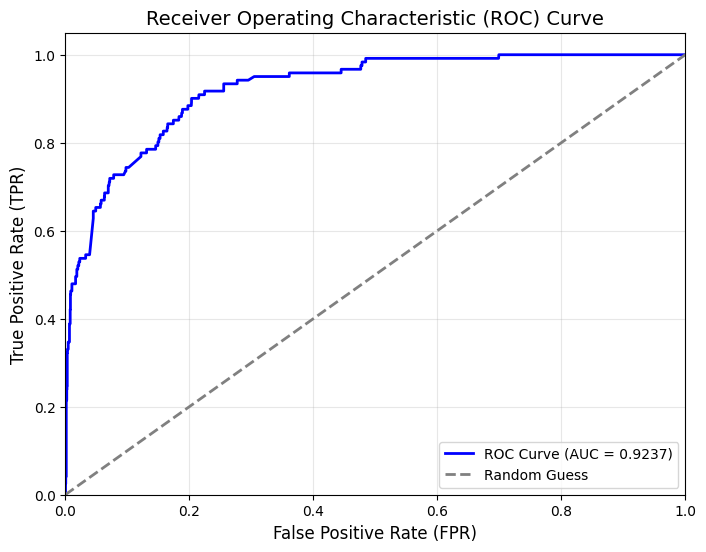

In [ ]:
evaluate_model(LogRmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.2.2. Count Vect

Cross-Validation ROC_AUC Scores: [0.98092787 0.97603948 0.97438263 0.97924615 0.9861676 ]
Cross-Validation Mean ROC_AUC: 0.9794
Validation AUC-ROC: 0.9592

Confusion Matrix Table:
                     Predicted Negative   Predicted Positive  
Actual Negative      2515                 9                   
Actual Positive      31                   90                  

Test Accuracy: 0.9849
Test Precision: 0.9091
Test Recall: 0.7438
Test F1 Score: 0.8182
Test AUC-ROC: 0.9685


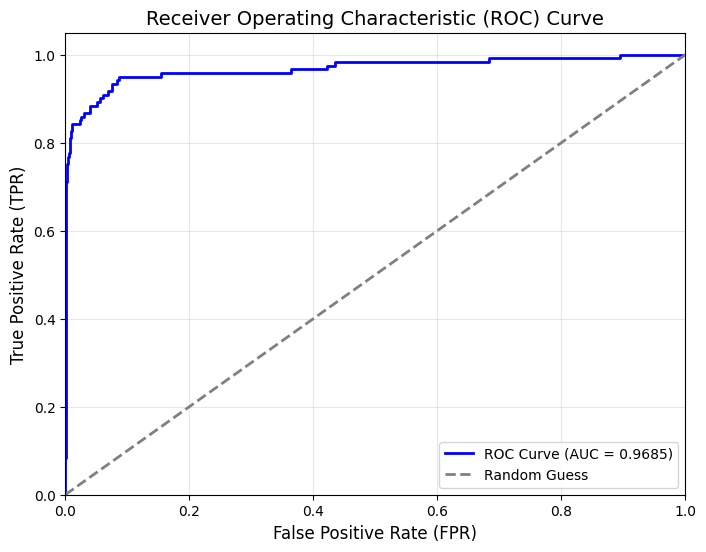

In [ ]:
evaluate_model(LogRmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.2.3. TF-IDF

Cross-Validation ROC_AUC Scores: [0.96960892 0.97374878 0.97504298 0.98235923 0.9847281 ]
Cross-Validation Mean ROC_AUC: 0.9771
Validation AUC-ROC: 0.9508

Confusion Matrix Table:
                     Predicted Negative   Predicted Positive  
Actual Negative      2523                 1                   
Actual Positive      70                   51                  

Test Accuracy: 0.9732
Test Precision: 0.9808
Test Recall: 0.4215
Test F1 Score: 0.5896
Test AUC-ROC: 0.9743


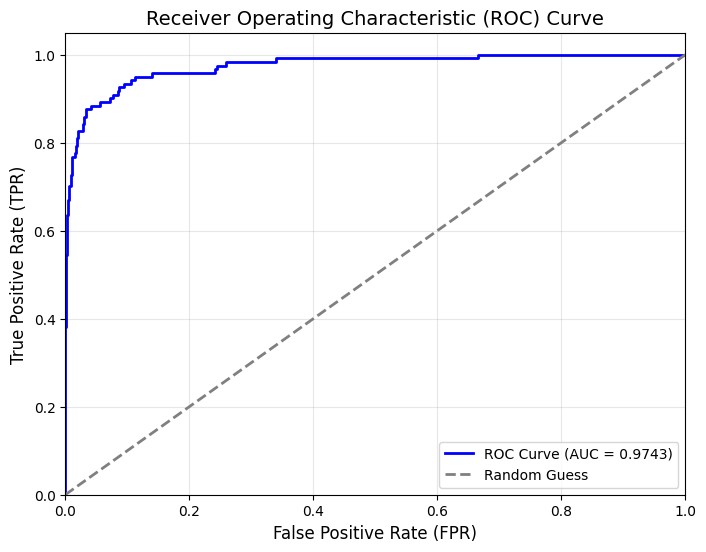

In [ ]:
evaluate_model(LogRmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

## 6.3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)

#### 6.3.1. Categorical variables only

Cross-Validation ROC_AUC Scores: [0.94527719 0.93898107 0.96806738 0.96743148 0.94311559]
Cross-Validation Mean ROC_AUC: 0.9526
Validation AUC-ROC: 0.9539

Confusion Matrix Table:
                     Predicted Negative   Predicted Positive  
Actual Negative      2522                 2                   
Actual Positive      54                   67                  

Test Accuracy: 0.9788
Test Precision: 0.9710
Test Recall: 0.5537
Test F1 Score: 0.7053
Test AUC-ROC: 0.9569


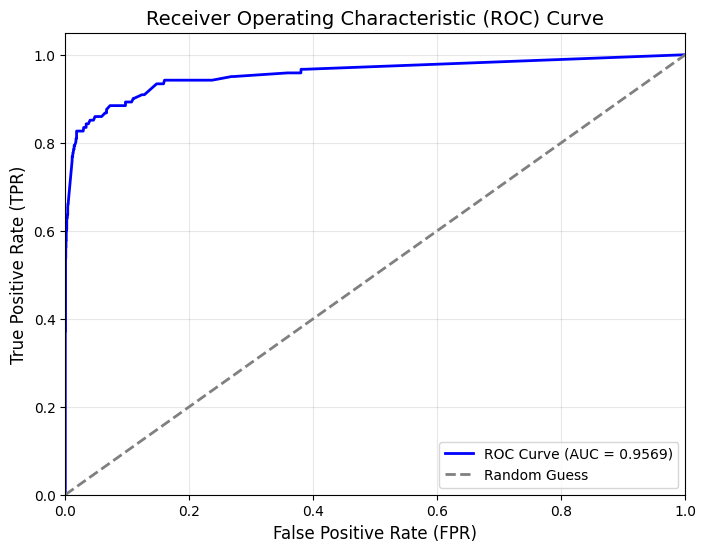

In [ ]:
evaluate_model(RFmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.3.2. Count Vect

In [ ]:
evaluate_model(RFmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.3.3. TF-IDF

In [ ]:
evaluate_model(RFmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

### 6.4. Decision Tree Classfier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(
    max_depth=5,              # Limit the depth of the tree to prevent overfitting
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=5,       # Minimum samples required to be a leaf node
    random_state=42           # Ensure reproducibility
)


#### 6.4.1. Categorical variables only

In [25]:
evaluate_model(DTmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

NameError: name 'evaluate_model' is not defined

#### 6.4.2. Count Vect

In [ ]:
evaluate_model(DTmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.4.3. TF-IDF

In [ ]:
evaluate_model(DTmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

## 6.5. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
SVMmodel = SVC(kernel='rbf', probability=True, random_state=42)

#### 6.5.1. Categorical variables only

In [ ]:
evaluate_model(SVMmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.5.2. Count Vect

In [ ]:
evaluate_model(SVMmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.5.3. TF-IDF

In [ ]:
evaluate_model(SVMmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

### 6.6. Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

nn_model_cat = Sequential([
    Input(shape=(X_train_cat.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_cat.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model_count = Sequential([
    Input(shape=(X_train_count.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_count.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model_tfidf = Sequential([
    Input(shape=(X_train_tfidf.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

For Neural Network we use a threshold probability of 0.5 to determine if prediction is fraud or not

#### 6.6.1. Categorical Variables Only

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9860 - loss: 0.0393 - val_accuracy: 0.9716 - val_loss: 0.1217
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9885 - loss: 0.0347 - val_accuracy: 0.9735 - val_loss: 0.1199
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9881 - loss: 0.0341 - val_accuracy: 0.9735 - val_loss: 0.1236
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9883 - loss: 0.0350 - val_accuracy: 0.9747 - val_loss: 0.1201
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9883 - loss: 0.0342 - val_accuracy: 0.9705 - val_loss: 0.1276
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9863 - loss: 0.0376 - val_accuracy: 0.9599 - val_loss: 0.1343
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9885 - loss: 0.0334 - val_accuracy: 0.9720 - val_loss: 0.1279
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9874 - loss: 0.0376 - val_accuracy

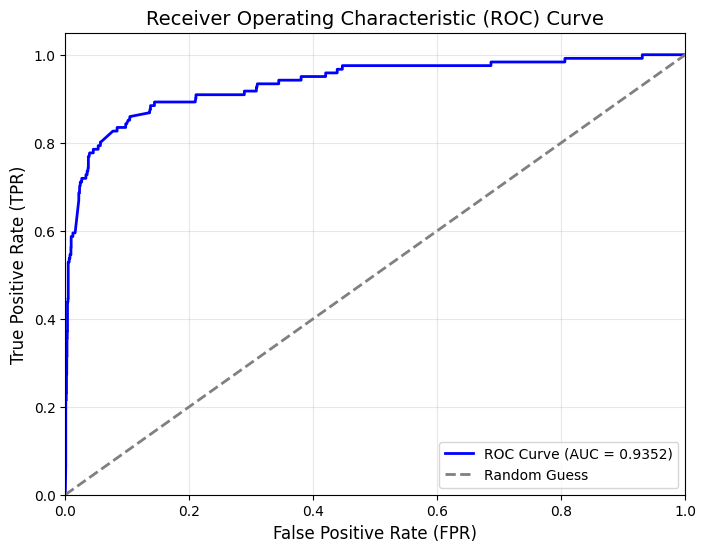

In [ ]:
evaluate_keras_nn_model(nn_model,  X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, epochs=20, batch_size=32)

#### 6.6.2. Count Vectorizer

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9520 - loss: 0.1616 - val_accuracy: 0.9811 - val_loss: 0.0801
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9928 - loss: 0.0322 - val_accuracy: 0.9849 - val_loss: 0.0757
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9978 - loss: 0.0082 - val_accuracy: 0.9856 - val_loss: 0.0912
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9856 - val_loss: 0.1035
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9849 - val_loss: 0.1129
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9853 - val_loss: 0.1232
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9999 - loss: 5.9654e-04 - val_accuracy: 0.9849 - val_loss: 0.1284
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9999 - loss: 4.7538

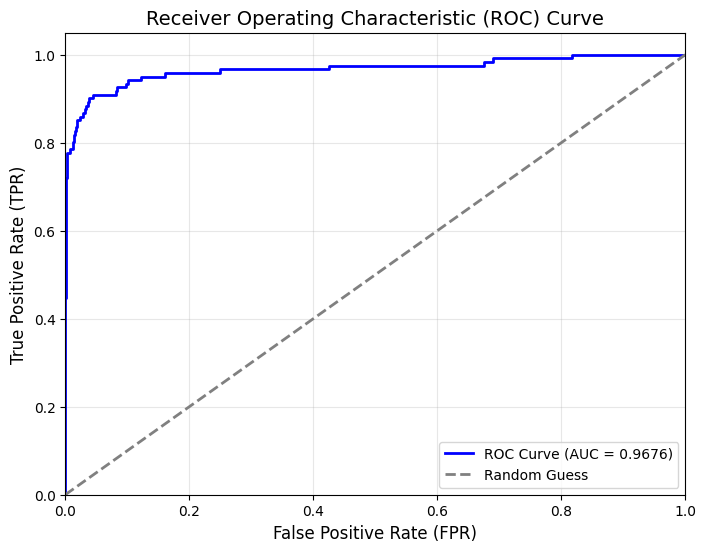

In [ ]:
evaluate_keras_nn_model(nn_model_count,  X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, epochs=20, batch_size=32)

#### 6.6.3. TF-IDF

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9345 - loss: 0.4547 - val_accuracy: 0.9716 - val_loss: 0.0916
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9825 - loss: 0.0598 - val_accuracy: 0.9841 - val_loss: 0.0562
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9968 - loss: 0.0153 - val_accuracy: 0.9856 - val_loss: 0.0549
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9987 - loss: 0.0079 - val_accuracy: 0.9841 - val_loss: 0.0567
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9849 - val_loss: 0.0623
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 0.9849 - val_loss: 0.0650
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9849 - val_loss: 0.0692
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 1.0000 - loss: 7.9122e-04 -

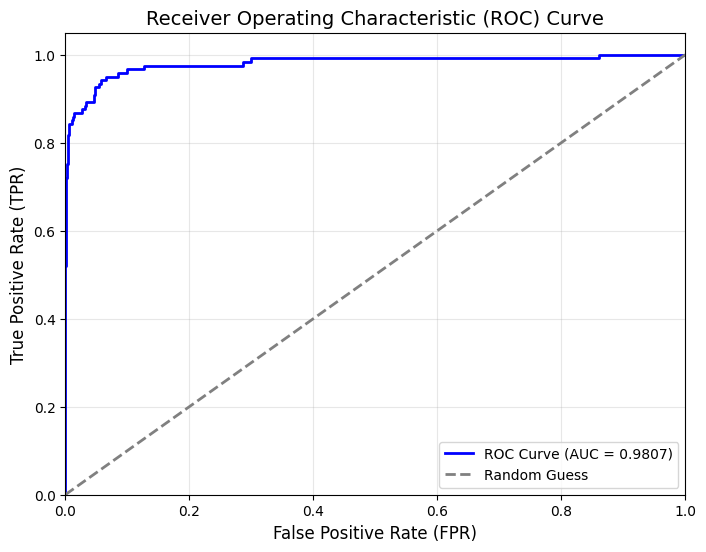

In [ ]:
evaluate_keras_nn_model(nn_model_tfidf, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, epochs=20, batch_size=32)

### 6.7. XGBOOST

In [ ]:
from xgboost import XGBClassifier
XGBmodel = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    use_label_encoder=False,  # Disable label encoder to avoid warnings
    eval_metric='auc',   
    random_state=42
    verbosity = 0
)

#### 6.7.1. Categorical variables only

In [ ]:
evaluate_model(XGBmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.7.2. Count Vect

In [ ]:
evaluate_model(XGBmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.7.3. TF-IDF

In [ ]:
evaluate_model(XGBmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

### 6.8. LightBoost

In [27]:
import lightgbm as lgb

LGBmodel = lgb.LGBMClassifier(verbose=-1, random_state=42)

#### 6.8.1. Categorical Variables Only

In [ ]:
evaluate_model(LGBmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.8.2. Count Vect

In [ ]:
evaluate_model(LGBmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.8.3. TFIDF

In [ ]:
evaluate_model(LGBmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')

### 6.9. CatBoost

In [ ]:
from catboost import CatBoostClassifier

# X_train_combined_dense = X_train_combined_count.toarray()
# X_val_combined_dense = X_val_combined_count.toarray()
# X_test_combined_dense = X_test_combined_count.toarray()

CATmodel = CatBoostClassifier(
    iterations=1000,              # Number of boosting iterations
    learning_rate=0.1,            # Learning rate
    depth=6,                      # Depth of the tree
    loss_function='Logloss',      # Binary classification loss
    eval_metric='AUC',            # Evaluation metric
    random_seed=42,               # Seed for reproducibility
    verbose=100                   # Print training progress every 100 iterations
)

#### 6.9.1. Categorical Variables Only

In [ ]:
evaluate_model(CATmodel, X_train_cat, y_train_cat, X_val_cat, y_val_cat, X_test_cat, y_test_cat, scoring='roc_auc')

#### 6.9.2. Count Vectoriser

In [ ]:
evaluate_model(CATmodel, X_train_count, y_train, X_val_count, y_val, X_test_count, y_test, scoring='roc_auc')

#### 6.9.3. TFIDF

In [ ]:
evaluate_model(CATmodel, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test, scoring='roc_auc')